In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
X, y = wine.data, wine.target
X.shape, y.shape, set(y)

((178, 13), (178,), {0, 1, 2})

In [23]:
wine.target_names[0]

'class_0'

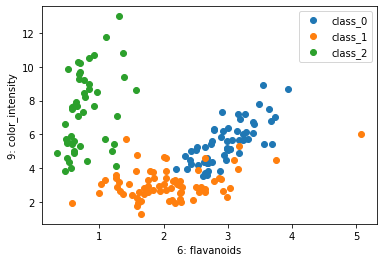

In [25]:
import matplotlib.pylab as plt

i,j = 6,9
plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")
for k in set(y):
    plt.plot(X[:, i][y==k], X[:, j][y==k], "o", label=f"{wine.target_names[k]}")
plt.legend()
plt.show()

In [19]:
X69 = X[:, [6,9]]
X69.shape

(178, 2)

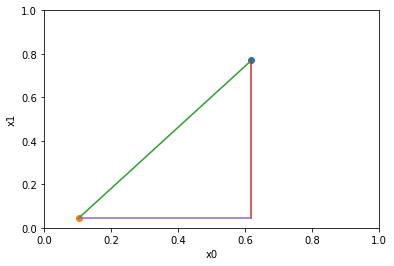

In [202]:
import matplotlib.pylab as plt
import numpy as np

x = np.random.rand(2,2)

plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel("x0")
plt.ylabel("x1")
for i in range(2):
    plt.plot(x[i,0], x[i,1], "o")
plt.plot(x[:,0], x[:,1])
plt.plot([x[0,0],x[0,0]], [x[0,1],x[1,1]])
plt.plot([x[0,0],x[1,0]], [x[1,1],x[1,1]])
plt.show()

In [233]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

class vizinho():
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancia(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz
    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
        return ypred

modelo = vizinho()
modelo.fit(X69, y)
ypred = modelo.predict(X69)
acuracia = accuracy_score(y, ypred)
acuracia

1.0

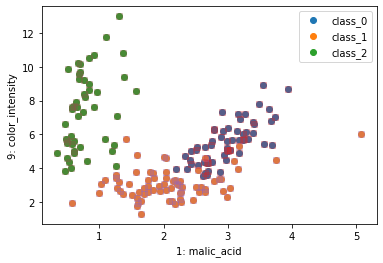

In [247]:
plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")
for k in set(y):
    plt.plot(X69[:, 0][y==k], X69[:, 1][y==k], "o", label=f"{wine.target_names[k]}")
for k in set(ypred):
    plt.plot(X69[:, 0][ypred==k], X69[:, 1][ypred==k], "s", alpha=0.3)
plt.legend()
plt.show()